In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

<b><font color='red' size='6'>ch12. 데이터 프레임과 시리즈(Pandas)</font></b>

# 9절. 데이터 그룹화 및 집계

In [2]:
import pandas as pd
import numpy as np
from statsmodels.api import datasets

iris = datasets.get_rdataset('iris').data
print(iris.shape)
iris.iloc[[0, 49, 50, 99, 100, 149]]

(150, 5)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
99,5.7,2.8,4.1,1.3,versicolor
100,6.3,3.3,6.0,2.5,virginica
149,5.9,3.0,5.1,1.8,virginica


## 9.1 Group by
cf. pivot_table

In [3]:
# 1) 그룹화 방법1
# df.groupby(by=[그룹핑할 열])[함수를 적용해서 출력할 열들].기초통계함수(.sum(), .min(), ...)
#      [함수를 적용해서 출력할 열들] 생략 시 : 모든 열에 함수 적용
iris_grouped = iris.groupby(iris.Species)  # iris.Species : grouping 기준 열
iris_grouped_sum = iris_grouped.sum()
iris_grouped_sum

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [4]:
iris_grouped_sum.loc['setosa']

Sepal.Length    250.3
Sepal.Width     171.4
Petal.Length     73.1
Petal.Width      12.3
Name: setosa, dtype: float64

In [5]:
print(iris_grouped_sum.columns)  # 2차원
print(iris_grouped_sum.index)  # 1차원

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'], dtype='object')
Index(['setosa', 'versicolor', 'virginica'], dtype='object', name='Species')


In [6]:
iris_grouped_sum.reset_index(inplace=True)  # index를 컬럼 데이터로 편입

In [7]:
iris_grouped_sum

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [8]:
# iris_grouped_sum에서 setosa 그룹함수 결과만 추출
iris_grouped_sum[iris_grouped_sum['Species'] == 'setosa']
iris_grouped_sum[iris_grouped_sum.Species == 'setosa']
iris_grouped_sum.loc[iris_grouped_sum.Species == 'setosa']
iris_grouped_sum.loc[iris_grouped_sum.Species.str.contains('setosa')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3


In [9]:
# iris_grouped_sum에서 setosa와 virginica 그룹함수 결과만 추출
iris_grouped_sum[(iris_grouped_sum.Species == 'setosa') |
                 (iris_grouped_sum.Species == 'virginica')]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [10]:
iris_grouped_sum[iris_grouped_sum.Species.isin(['setosa', 'virginica'])]

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
2,virginica,329.4,148.7,277.6,101.3


In [11]:
# 1) 그룹화 방법 1.1 : 그룹핑할 때 index를 컬럼 데이터로 편입(reset_index가 필요 없음)
# df.groupby(by=[그룹핑할 열], as_index=False)[함수를 적용해서 출력할 열들].기초통계함수(.sum(), .min(), ...)
#      [함수를 적용해서 출력할 열들] 생략 시 : 모든 열에 함수 적용
iris.groupby(iris.Species, as_index=False).sum()

,Species,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,250.3,171.4,73.1,12.3
1,versicolor,296.8,138.5,213.0,66.3
2,virginica,329.4,148.7,277.6,101.3


In [12]:
display(iris.groupby(iris.Species).sum())
display(iris.groupby(by=['Species']).sum())
display(iris.groupby('Species').sum())  # by= 생략가능

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


In [13]:
# 종별 Sepal.Length와 Sepal.Width의 평균 출력
iris.groupby('Species').mean()[['Sepal.Length', 'Sepal.Width']]
iris.groupby('Species')[['Sepal.Length', 'Sepal.Width']].mean()

,Sepal.Length,Sepal.Width
Species,,
setosa,5.006,3.428
versicolor,5.936,2.770
virginica,6.588,2.974


In [14]:
# 종별 Sepal.Length의 합계만 출력
iris.groupby('Species')['Sepal.Length'].sum()  # 결과 : 시리즈(1차원)

Species
setosa        250.3
versicolor    296.8
virginica     329.4
Name: Sepal.Length, dtype: float64

In [15]:
# 종별 Sepal.Length의 합계만 출력
iris.groupby('Species')[['Sepal.Length']].sum()  # 결과 : 데이터프레임(2차원)

,Sepal.Length
Species,
setosa,250.3
versicolor,296.8
virginica,329.4


In [16]:
# 1) 그룹화 방법1
# df.groupby(by=[그룹핑할 열])[함수를 적용해서 출력할 열들].기초통계함수(.sum(), .min(), ...)
# 2) 그룹화 방법 2
# df.pivot_table(index='그룹화할 필드들',
#                values=['함수를 적용해서 출력할 열들'], : 생략시 모든 열에 함수 적용
#                aggfunc='함수명(기본값:mean)')
iris.pivot_table(index='Species')  # 종별 평균들

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,1.462,0.246,5.006,3.428
versicolor,4.260,1.326,5.936,2.770
virginica,5.552,2.026,6.588,2.974


In [17]:
# iris.groupby('Species')[['Sepal.Length', 'Sepal.Width']].sum()
iris.pivot_table(index='Species',
                 values=['Sepal.Length', 'Sepal.Width'],
                 aggfunc='sum')

,Sepal.Length,Sepal.Width
Species,,
setosa,250.3,171.4
versicolor,296.8,138.5
virginica,329.4,148.7


In [18]:
iris.groupby('Species').count()  # 결측치를 제외한 데이터 갯수

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [19]:
iris.pivot_table(index='Species', aggfunc='count')  # 결측치를 제외한 데이터 갯수

,Petal.Length,Petal.Width,Sepal.Length,Sepal.Width
Species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [20]:
import random

random.sample(range(len(iris)), 3)

[29, 98, 2]

In [58]:
iris.shape[1]-1  # iris의 독립변수 열 갯수(-1:Species 제외)

4

In [22]:
# 각 열에 임의의 행에 결측치를 할당
# (0번째 열 결측치 1개, 1번째 열 결측치 2개, 2번째 열 결측치 3개, 3번째 열 결측치 4개)
for col in range(iris.shape[1] - 1):
    iris.iloc[random.sample(range(len(iris)), col + 1), col] = np.nan

In [23]:
iris.groupby('Species').count()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,48,49,48
versicolor,49,50,48,50
virginica,50,50,50,48


In [24]:
result = iris.pivot_table(index='Species',
                          # values=['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width'],
                          aggfunc='count')
result = result[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']]
result

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,50,48,49,48
versicolor,49,50,48,50
virginica,50,50,50,48


In [25]:
iris['Species'].value_counts()  # 종별 데이터 갯수

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

### 다중열로 그룹화

In [26]:
# iris.groupby(['Species', 'Sepal.Length']).sum()
iris.head(1)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa


In [27]:
# iris로 다중열 그룹화 하기 위해 데이터 추가(num 필드)
# iris의 행수가 150개 = Species 3그룹, num 6그룹으로 나뉘도록
[[i]*25 for i in range(6)]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
 [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]

In [28]:
import numpy as np
iris['num'] = np.ravel([[i]*25 for i in range(6)])
iris.iloc[::10]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


In [29]:
# 종별, num별 합계
r = iris.groupby(by=['Species', 'num']).sum()
r

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0           125.7         83.9          35.0          6.2
           1           124.6         81.0          36.6          5.7
versicolor 2           144.2         69.4          99.8         33.6
           3           146.5         69.1         105.2         32.7
virginica  4           164.4         73.2         141.0         48.8
           5           165.0         75.5         136.6         48.0

In [30]:
r.index  # 2차원

MultiIndex([(    'setosa', 0),
            (    'setosa', 1),
            ('versicolor', 2),
            ('versicolor', 3),
            ( 'virginica', 4),
            ( 'virginica', 5)],
           names=['Species', 'num'])

In [31]:
r.loc[['setosa', 'virginica']]  # setosa와 virginica만 결과 추출

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species   num                                                      
setosa    0           125.7         83.9          35.0          6.2
          1           124.6         81.0          36.6          5.7
virginica 4           164.4         73.2         141.0         48.8
          5           165.0         75.5         136.6         48.0

In [32]:
# 종별, num별 중위수 ('Species', 'num'이 컬럼 데이터로 편입)
r = iris.groupby(by=['Species', 'num'], as_index=False).median()
r

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.00,3.45,1.45,0.20
1,setosa,1,5.00,3.40,1.50,0.20
2,versicolor,2,6.05,2.80,4.50,1.40
3,versicolor,3,5.70,2.80,4.20,1.30
4,virginica,4,6.50,2.90,5.60,2.00
5,virginica,5,6.40,3.00,5.50,1.95


In [33]:
# setosa와 virginica만 추출
r[ (r['Species'] == 'setosa') | (r['Species'] == 'virginica') ]
r[ r['Species'].isin(['setosa', 'virginica'])]

,Species,num,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,setosa,0,5.0,3.45,1.45,0.20
1,setosa,1,5.0,3.40,1.50,0.20
4,virginica,4,6.5,2.90,5.60,2.00
5,virginica,5,6.4,3.00,5.50,1.95


In [34]:
# iris.groupby(by=['Species', 'num']).sum() 과 동일
iris.pivot_table(index=['Species', 'num'],
                # values=[],
                aggfunc='sum')

Petal.Length  Petal.Width  Sepal.Length  Sepal.Width
Species    num                                                      
setosa     0            35.0          6.2         125.7         83.9
           1            36.6          5.7         124.6         81.0
versicolor 2            99.8         33.6         144.2         69.4
           3           105.2         32.7         146.5         69.1
virginica  4           141.0         48.8         164.4         73.2
           5           136.6         48.0         165.0         75.5

In [35]:
# 종별 기초 통계량(min, max, count, mean, median, Q1, Q3, std, ...) 전부
iris.groupby(['Species']).describe().T

Species                setosa  versicolor  virginica
Sepal.Length count  50.000000   49.000000  50.000000
             mean    5.006000    5.932653   6.588000
             std     0.352490    0.520972   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
Sepal.Width  count  48.000000   50.000000  50.000000
             mean    3.435417    2.770000   2.974000
             std     0.383982    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.700000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
Petal.Length count  49.000000   48.000000  50.000000
             mean    1.461224    4.270833   5.552000
             std     0.175376    0.476672   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.400000   5.550000
             75%     1.600000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
Petal.Width  count  48.000000   50.000000  48.000000
             mean    0.247917    1.326000   2.016667
             std     0.107168    0.197753   0.276246
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000
num          count  50.000000   50.000000  50.000000
             mean    0.500000    2.500000   4.500000
             std     0.505076    0.505076   0.505076
             min     0.000000    2.000000   4.000000
             25%     0.000000    2.000000   4.000000
             50%     0.500000    2.500000   4.500000
             75%     1.000000    3.000000   5.000000
             max     1.000000    3.000000   5.000000

In [36]:
g = iris.groupby(['Species'])[['Sepal.Length',
                              'Sepal.Width',
                              'Petal.Length',
                              'Petal.Width']].mean()
g

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006000,3.435417,1.461224,0.247917
versicolor,5.932653,2.770000,4.270833,1.326000
virginica,6.588000,2.974000,5.552000,2.016667


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

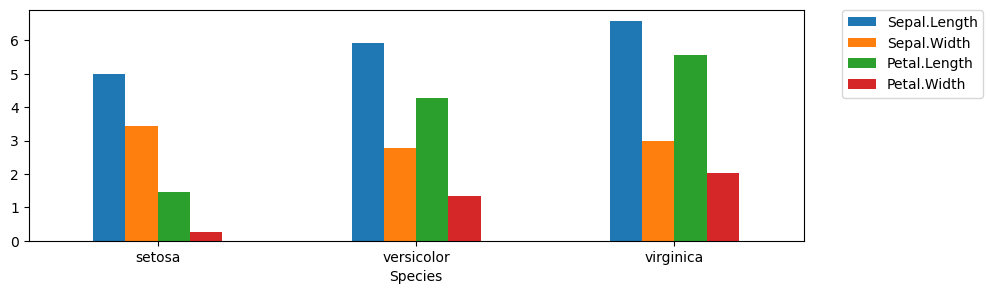

In [37]:
import matplotlib.pyplot as plt
g.plot(kind='bar', figsize=(10, 3), rot=0)  # 그래프화
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # 범례 위치 변경
plt.show()

In [38]:
# 종별, num별 평균
g = iris.groupby(['Species', 'num']).mean()
g

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Species    num                                                      
setosa     0        5.028000     3.495833      1.458333     0.248000
           1        4.984000     3.375000      1.464000     0.247826
versicolor 2        6.008333     2.776000      4.339130     1.344000
           3        5.860000     2.764000      4.208000     1.308000
virginica  4        6.576000     2.928000      5.640000     2.033333
           5        6.600000     3.020000      5.464000     2.000000

In [39]:
# g의 level0 인덱스만 유지하고, level1의 인덱스를 컬럼값으로 올리기
g.unstack()

Sepal.Length                                    Sepal.Width         \
num                   0      1         2     3      4    5           0      1   
Species                                                                         
setosa            5.028  4.984       NaN   NaN    NaN  NaN    3.495833  3.375   
versicolor          NaN    NaN  6.008333  5.86    NaN  NaN         NaN    NaN   
virginica           NaN    NaN       NaN   NaN  6.576  6.6         NaN    NaN   

                          ... Petal.Length                     Petal.Width  \
num             2      3  ...            2      3     4      5           0   
Species                   ...                                                
setosa        NaN    NaN  ...          NaN    NaN   NaN    NaN       0.248   
versicolor  2.776  2.764  ...      4.33913  4.208   NaN    NaN         NaN   
virginica     NaN    NaN  ...          NaN    NaN  5.64  5.464         NaN   

                                                   
num                1      2      3         4    5  
Species                                            
setosa      0.247826    NaN    NaN       NaN  NaN  
versicolor       NaN  1.344  1.308       NaN  NaN  
virginica        NaN    NaN    NaN  2.033333  2.0  

[3 rows x 24 columns]

In [40]:
g.unstack().T

Species             setosa  versicolor  virginica
             num                                 
Sepal.Length 0    5.028000         NaN        NaN
             1    4.984000         NaN        NaN
             2         NaN    6.008333        NaN
             3         NaN    5.860000        NaN
             4         NaN         NaN   6.576000
             5         NaN         NaN   6.600000
Sepal.Width  0    3.495833         NaN        NaN
             1    3.375000         NaN        NaN
             2         NaN    2.776000        NaN
             3         NaN    2.764000        NaN
             4         NaN         NaN   2.928000
             5         NaN         NaN   3.020000
Petal.Length 0    1.458333         NaN        NaN
             1    1.464000         NaN        NaN
             2         NaN    4.339130        NaN
             3         NaN    4.208000        NaN
             4         NaN         NaN   5.640000
             5         NaN         NaN   5.464000
Petal.Width  0    0.248000         NaN        NaN
             1    0.247826         NaN        NaN
             2         NaN    1.344000        NaN
             3         NaN    1.308000        NaN
             4         NaN         NaN   2.033333
             5         NaN         NaN   2.000000

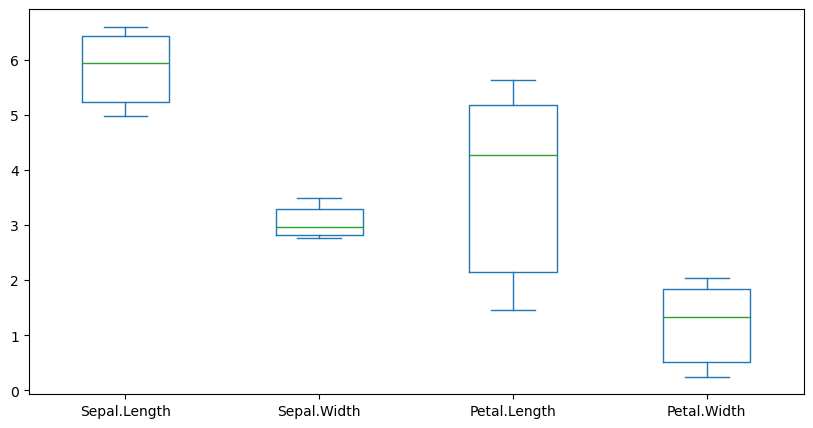

In [41]:
g.plot(kind='box', figsize=(10, 5))
plt.show()

## 9.2 그룹간 데이터 처리

In [42]:
iris_grouped = iris.groupby('Species')
iris_grouped

In [43]:
for speciename, group in iris_grouped:
    print(speciename)
    display(group.head(3))
    print('■■■■■■■■■■■■■■■■■■■■■■■■■■■■■')

setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
51,6.4,3.2,4.5,1.5,versicolor,2
52,6.9,3.1,4.9,1.5,versicolor,2


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
101,5.8,2.7,5.1,1.9,virginica,4
102,7.1,3.0,5.9,2.1,virginica,4


■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


In [44]:
# 종별 임의의 표본 5개씩 출력
# iris.sample(5).sort_index()
for idx, (speciesname, group) in enumerate(iris_grouped):
    print('{}번째 그룹은 {}'.format(idx, speciesname))
    display(group.sample(5).sort_index())

0번째 그룹은 setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
3,4.6,NaN,1.5,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
14,5.8,4.0,1.2,0.2,setosa,0
22,4.6,3.6,1.0,0.2,setosa,0
39,5.1,3.4,1.5,0.2,setosa,1


1번째 그룹은 versicolor


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
57,4.9,2.4,3.3,1.0,versicolor,2
61,5.9,3.0,4.2,1.5,versicolor,2
74,6.4,2.9,4.3,1.3,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
89,5.5,2.5,4.0,1.3,versicolor,3


2번째 그룹은 virginica


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
112,6.8,3.0,5.5,2.1,virginica,4
117,7.7,3.8,6.7,2.2,virginica,4
139,6.9,3.1,5.4,2.1,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5
145,6.7,3.0,5.2,2.3,virginica,5


In [45]:
# 종별 0, 10, 20, 30, 40번째 데이터 출력
# sts(0, 10, 20, 30, 40)행, vc(50, 60, 70, 80, 90)행, vn(100, 110, 120, 130, 140)행
for speciesname, group in iris.groupby('Species'):
    print(speciesname, '그룹')
    #display(group.iloc[[0, 10, 20, 30, 40]])
    display(group[::10])

setosa 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
0,5.1,3.5,1.4,0.2,setosa,0
10,5.4,3.7,1.5,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
30,4.8,3.1,1.6,0.2,setosa,1
40,5.0,3.5,1.3,0.3,setosa,1


versicolor 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
50,7.0,3.2,4.7,1.4,versicolor,2
60,5.0,2.0,3.5,1.0,versicolor,2
70,5.9,3.2,4.8,1.8,versicolor,2
80,5.5,2.4,3.8,1.1,versicolor,3
90,5.5,2.6,4.4,1.2,versicolor,3


virginica 그룹


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,num
100,6.3,3.3,6.0,2.5,virginica,4
110,6.5,3.2,5.1,2.0,virginica,4
120,6.9,3.2,5.7,NaN,virginica,4
130,7.4,2.8,6.1,1.9,virginica,5
140,6.7,3.1,5.6,2.4,virginica,5


## 9.3 데이터 프레임 그룹 인덱싱

In [46]:
t = iris.groupby('Species').take([0, 10, 20, 30, 40])
t

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  num
Species                                                                  
setosa     0             5.1          3.5           1.4          0.2    0
           10            5.4          3.7           1.5          0.2    0
           20            5.4          3.4           1.7          0.2    0
           30            4.8          3.1           1.6          0.2    1
           40            5.0          3.5           1.3          0.3    1
versicolor 50            7.0          3.2           4.7          1.4    2
           60            5.0          2.0           3.5          1.0    2
           70            5.9          3.2           4.8          1.8    2
           80            5.5          2.4           3.8          1.1    3
           90            5.5          2.6           4.4          1.2    3
virginica  100           6.3          3.3           6.0          2.5    4
           110           6.5          3.2           5.1          2.0    4
           120           6.9          3.2           5.7          NaN    4
           130           7.4          2.8           6.1          1.9    5
           140           6.7          3.1           5.6          2.4    5

In [47]:
t.loc['setosa']

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,num
0,5.1,3.5,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
30,4.8,3.1,1.6,0.2,1
40,5.0,3.5,1.3,0.3,1


## 9.4 레이블(원핫인코딩)

In [48]:
iris.drop('num', axis=1, inplace=True)
iris

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [49]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,NaN,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# 레이블(원핫인코딩)을 지원하는 패키지를 이용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # 객체
iris['target'] = le.fit_transform(iris.Species)
iris.iloc[::25]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,target
0,5.1,3.5,1.4,0.2,setosa,0
25,5.0,3.0,1.6,0.2,setosa,0
50,7.0,3.2,4.7,1.4,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
125,7.2,3.2,6.0,1.8,virginica,2


# 10절. 데이터 구조 변경
## 10.1 와이드포맷 <-> 롱포맷
- 판다스 공식 문서에 나오는 melt : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
- [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf) 

In [54]:
import statsmodels.api as sm
airquality = sm.datasets.get_rdataset('airquality', package='datasets').data
airquality

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


## 10.2 melt를 이용한 언피벗팅(와이드포맷 -> 롱포맷)

In [56]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])
airquality_melted

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN
...,...,...,...,...
607,9,26,Temp,70.0
608,9,27,Temp,77.0
609,9,28,Temp,75.0
610,9,29,Temp,76.0


In [74]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'],
                                    var_name='변수명',  # melt된 열의 이름
                                    value_name='값')  # 데이터가 된 열의 이름
airquality_melted = airquality_melted.sort_values(by=['Month', 'Day'])
airquality_melted.reset_index(drop=True)

,Month,Day,변수명,값
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0
...,...,...,...,...
607,9,29,Temp,76.0
608,9,30,Ozone,20.0
609,9,30,Solar.R,223.0
610,9,30,Wind,11.5


### melt 연습하기 예제(와일드포맷 -> 롱포맷)

In [148]:
%ls D:\imsehyeon\Downloads\shareData\

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: EC0C-568F

 D:\imsehyeon\Downloads\shareData 디렉터리

2024-11-25  오후 02:43    <DIR>          .
2024-11-25  오후 02:43    <DIR>          ..
2024-11-18  오후 04:13    <DIR>          상가정보
2024-11-18  오후 04:02       290,230,709 소상공인시장진흥공단_상가(상권)정보_20240930.zip
2021-01-02  오후 03:44             2,163 전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv
2024-11-18  오후 03:56           415,443 주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv
               3개 파일         290,648,315 바이트
               3개 디렉터리  233,150,898,176 바이트 남음


In [149]:
df_first = pd.read_csv(r'D:\imsehyeon\Downloads\shareData\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                       encoding='cp949')
df_last = pd.read_csv(r'D:\imsehyeon\Downloads\shareData\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20240731.csv',
                     encoding='cp949')
df_first.shape, df_last.shape

((17, 22), (9010, 5))

In [150]:
df_first.head(1)  # => new_first(지역명, 연도, 월, 분양가격(제곱미터))

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [151]:
df_last.head(1)  # => new_last(모든면적 행만 지역명, 연도, 월, 분양가격(제곱미터))

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [152]:
# 지역 연도월별 평당분양가격 식의 롱포맷 데이터로 바꾸기
new_first = df_first.melt(id_vars=['지역'],  # 고정
                          var_name='연도월',
                          value_name='평당분양가격')
new_first.sample(1)

,지역,연도월,평당분양가격
317,충남,2015년6월,6939


In [153]:
# 연도월 컬럼을 연도, 월로 분리 "2013년12월 => 2013, 12" 각 컬럼을 담을 필드 필요
def parse_year(x):
    return int(x.split("년")[0])
parse_year("2013년12월")

2013

In [154]:
# new_first['연도월'].map(lambda x : int(x.split('년')[0]))  # map은 1차원에서만 가능
new_first['연도'] = new_first['연도월'].apply(lambda x : int(x.split('년')[0]))  # apply는 1,2차원 모두 가능
new_first.head(1)

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013


In [155]:
def parse_month(x):
    #return int(x.split('년')[-1][:-1])
    return int(x.split('년')[-1].replace('월', ''))
parse_month("2013년12월")

12

In [156]:
new_first['월'] = new_first['연도월'].map(lambda x : int(x.split('년')[-1].replace('월', '')))
new_first.tail(1)

,지역,연도월,평당분양가격,연도,월
356,제주,2015년8월,7343,2015,8


In [157]:
# 평당분양가격/3.3 => 분양가격(제곱미터) 필드 생성하기
new_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      357 non-null    object
 1   연도월     357 non-null    object
 2   평당분양가격  357 non-null    int64 
 3   연도      357 non-null    int64 
 4   월       357 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 14.1+ KB


In [158]:
new_first['분양가격(제곱미터)'] = new_first['평당분양가격']/3.3
new_first.sample(1)

,지역,연도월,평당분양가격,연도,월,분양가격(제곱미터)
137,부산,2014년8월,9411,2014,8,2851.818182


In [159]:
# '연도월', '평당분양가격' 필드 삭제, column명을 지역 -> 지역명으로 변경
new_first.drop(['연도월', '평당분양가격'], axis=1, inplace=True)
new_first.columns = ['지역명', '연도', '월', '분양가격(제곱미터)']
new_first.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


In [160]:
# df_last => new_last(모든면적 행만 지역명, 연도, 월, 분양가격(제곱미터))
new_last = df_last[df_last['규모구분'] == '모든면적']
new_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841


In [161]:
# new_last의 규모구분 열 삭제하기
new_last = new_last.drop(['규모구분'], axis=1)
new_last.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2015,10,5841


In [162]:
new_first.head(1)

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182


In [163]:
df = pd.concat( [new_first, new_last])
df.head()

,지역명,연도,월,분양가격(제곱미터)
0,서울,2013,12,5511.818182
1,부산,2013,12,2457.878788
2,대구,2013,12,2448.484848
3,인천,2013,12,3092.121212
4,광주,2013,12,1847.878788


## 10.3 pivot_table을 이용한 피벗팅(롱포맷 -> 와이드포맷)

In [170]:
airquality_melted = airquality.melt(id_vars=['Month', 'Day'])
airquality_melted = airquality_melted.sort_values(['Month', 'Day']).reset_index(drop=True)
airquality_melted.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,1,Solar.R,190.0
2,5,1,Wind,7.4
3,5,1,Temp,67.0
4,5,2,Ozone,36.0


In [181]:
airquality2 = airquality_melted.pivot_table(index=['Month', 'Day'],
                                            columns=['variable'],
                                            values=['value'])
airquality2.head()

value                    
variable  Ozone Solar.R  Temp  Wind
Month Day                          
5     1    41.0   190.0  67.0   7.4
      2    36.0   118.0  72.0   8.0
      3    12.0   149.0  74.0  12.6
      4    18.0   313.0  62.0  11.5
      5     NaN     NaN  56.0  14.3

In [182]:
airquality2.reset_index(level=['Month', 'Day'], col_level=1, inplace=True)
airquality2.head(1)

value                   
variable Month Day Ozone Solar.R  Temp Wind
0            5   1  41.0   190.0  67.0  7.4

In [184]:
airquality2.columns = airquality2.columns.droplevel(level=0)  # 0번 level의 컬럼 제거
airquality2.head(1)

variable,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


In [185]:
airquality2.columns.name = ''
airquality2.head(1)

,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4


## pivot_table(), pivot() 함수의 차이

In [188]:
import numpy as np
year = [2020]*3 + [2021]*3
mon = [1, 2, 3]*2
latte = [410, 401, 402, 400, 404, 405]
americano = [500, 483, 484, 470, 486, 488]
mocha = [350, 299, 300, 301, 302, 300]
sales = pd.DataFrame(np.c_[year, mon, latte, americano, mocha],
                    columns=['year', 'mon', 'latte', 'americano', 'mocha'])
sales

,year,mon,latte,americano,mocha
0,2020,1,410,500,350
1,2020,2,401,483,299
2,2020,3,402,484,300
3,2021,1,400,470,301
4,2021,2,404,486,302
5,2021,3,405,488,300


In [193]:
sales.groupby(['year'])[['latte', 'americano', 'mocha']].sum()

,latte,americano,mocha
year,,,
2020,1213,1467,949
2021,1209,1444,903


In [195]:
result = sales.pivot_table(index='year',
                           values=['latte', 'americano', 'mocha'],
                           aggfunc='sum')
result

,americano,latte,mocha
year,,,
2020,1467,1213,949
2021,1444,1209,903


In [198]:
result.loc[2021]

americano    1444
latte        1209
mocha         903
Name: 2021, dtype: int32

In [202]:
# pivot()
sales = sales.loc[:, 'year':'latte']
sales

,year,mon,latte
0,2020,1,410
1,2020,2,401
2,2020,3,402
3,2021,1,400
4,2021,2,404
5,2021,3,405


In [203]:
sales.pivot(index='year', columns='mon')

latte          
mon      1    2    3
year                
2020   410  401  402
2021   400  404  405

# 11절. 데이터프레임에 함수 적용시키기
 - apply(func, axis) : (데이터프레임이나 시리즈에서 모두 적용 가능)
 - applymap(fun) : 각 요소 별로 적용(2차원 데이터프레임에서만 가능)
 - map(fun) : 각 요소별로 적용(1차원 시리즈에서만 가능)

## 11.1 apply

In [227]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    5 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [228]:
member['Birth']  # 1차원 시리즈

0    1999-01-01
1    1999-12-01
2    1999-11-01
3    1999-05-01
4    1999-01-30
Name: Birth, dtype: object

In [229]:
def get_month(str):
    return int(str.split('-')[1])
get_month('2000-01-01')

1

In [230]:
member[member['Birth'].apply(lambda str : int(str.split('-')[1]) ) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [232]:
# ex2. 2차원 데이터프레임에 apply 적용(axis)
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [236]:
def year_month(series):
    return str(series['연도']) + '년' + str(series['월']) + '월'
year_month(df_last.loc[0])

'2015년10월'

In [240]:
df_last['연도월'] = df_last.apply(lambda series : str(series['연도']) + '년' + str(series['월']) + '월',
                               axis=1)
df_last.head(1)

,지역명,규모구분,연도,월,분양가격(제곱미터),연도월
0,서울,모든면적,2015,10,5841,2015년10월


In [242]:
# ex3 iris 데이터에 apply 적용
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [245]:
X = iris.iloc[:, :-1]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [246]:
X.apply(np.sum, axis=0)  # 열별 sum

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [247]:
X.apply(np.sum, axis=1)  # 행별 sum

0      10.2
1       9.5
2       9.4
3       9.4
4      10.2
       ... 
145    17.2
146    15.7
147    16.7
148    17.3
149    15.8
Length: 150, dtype: float64

In [248]:
# X의 열별 평균
avg = X.apply(np.average, axis=0)
avg

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [252]:
X.apply(lambda x : round(x-avg, 2), axis=1)  # 행별 평균과의 거리를 소수점 2자리까지 출력

,sepal_length,sepal_width,petal_length,petal_width
0,-0.74,0.44,-2.36,-1.0
1,-0.94,-0.06,-2.36,-1.0
2,-1.14,0.14,-2.46,-1.0
3,-1.24,0.04,-2.26,-1.0
4,-0.84,0.54,-2.36,-1.0
...,...,...,...,...
145,0.86,-0.06,1.44,1.1
146,0.46,-0.56,1.24,0.7
147,0.66,-0.06,1.44,0.8
148,0.36,0.34,1.64,1.1


In [255]:
X.apply(lambda x : list(round(x-avg, 2)), axis=1)

0       [-0.74, 0.44, -2.36, -1.0]
1      [-0.94, -0.06, -2.36, -1.0]
2       [-1.14, 0.14, -2.46, -1.0]
3       [-1.24, 0.04, -2.26, -1.0]
4       [-0.84, 0.54, -2.36, -1.0]
                  ...             
145       [0.86, -0.06, 1.44, 1.1]
146       [0.46, -0.56, 1.24, 0.7]
147       [0.66, -0.06, 1.44, 0.8]
148        [0.36, 0.34, 1.64, 1.1]
149       [0.06, -0.06, 1.34, 0.6]
Length: 150, dtype: object

## 11.2 applymap

In [256]:
X.applymap(np.round)

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,4.0,1.0,0.0
1,5.0,3.0,1.0,0.0
2,5.0,3.0,1.0,0.0
3,5.0,3.0,2.0,0.0
4,5.0,4.0,1.0,0.0
...,...,...,...,...
145,7.0,3.0,5.0,2.0
146,6.0,2.0,5.0,2.0
147,6.0,3.0,5.0,2.0
148,6.0,3.0,5.0,2.0


In [257]:
X.applymap(lambda x : x**2)

,sepal_length,sepal_width,petal_length,petal_width
0,26.01,12.25,1.96,0.04
1,24.01,9.00,1.96,0.04
2,22.09,10.24,1.69,0.04
3,21.16,9.61,2.25,0.04
4,25.00,12.96,1.96,0.04
...,...,...,...,...
145,44.89,9.00,27.04,5.29
146,39.69,6.25,25.00,3.61
147,42.25,9.00,27.04,4.00
148,38.44,11.56,29.16,5.29


## 11.3 map

In [259]:
# ex1. 1차원 시리즈에 apply 사용
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.head(1)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [263]:
member[member['Birth'].map(lambda date_str : int(date_str.split('-')[1])) == 1]

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


# 12절. 일괄 변경하기(결측치나 특정값)
## 12.1 fillna (결측치를 어떤 값으로 바꿈)
 - 대부분 결측치는 drop하거나, 평균값 대체, 최빈값 대체, 중위수 대체, 그룹별 평균값 대체, 그룹별 중위수 대체, 이전값으로 대체. 다음값으로 대체, 회귀식 결과 값으로 대체함

In [264]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3,      4, np.nan, 1],
                   [np.nan, 3, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                 columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [265]:
# 모든 결측치를 무조건 0으로 대체
df.fillna(0)

,A,B,C,D
0,0.0,2,0.0,0
1,3.0,4,0.0,1
2,0.0,3,0.0,5
3,0.0,3,0.0,4


In [266]:
# 결측치를 이전 행의 값으로 대체(이전행이 없으면 그대로)
df.fillna(method='ffill')

,A,B,C,D
0,NaN,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [267]:
# 결측치를 다음 행의 값으로 대체
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,NaN,3,NaN,5
3,NaN,3,NaN,4


In [268]:
# 결측치를 특정 대체값으로 바꿈
values = {'A' : 99, 'B' : 98, 'C' : 97, 'D' : 96}
df.fillna(value = values)

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,97.0,4


In [269]:
# 결측치를 열별 평균으로 바꿈
df.fillna(value=df.mean(axis=0))

,A,B,C,D
0,3.0,2,NaN,0
1,3.0,4,NaN,1
2,3.0,3,NaN,5
3,3.0,3,NaN,4


In [270]:
df.fillna(value=values, limit=3)  # 결측치 대체는 3번째 행까지만

,A,B,C,D
0,99.0,2,97.0,0
1,3.0,4,97.0,1
2,99.0,3,97.0,5
3,99.0,3,NaN,4


## 12.2 replace(to_value, new_value, inplace=T/F)
 - to_value를 new_value로 변경
 - 정규표현식 이용 가능

In [275]:
s = pd.Series([0, 1, 2, 3, None])
s.replace(np.nan, 0, inplace=True)
s.replace([0, 1], 99)  # 0이나 1을 99로 변경

0    99.0
1    99.0
2     2.0
3     3.0
4    99.0
dtype: float64

In [278]:
s = pd.Series([0, 1, 2, 3, None])
s.replace([0, 1, 2], [100, 101, 102])

0    100.0
1    101.0
2    102.0
3      3.0
4      NaN
dtype: float64

In [283]:
df = pd.DataFrame({'A' : ['bat', 'foo', 'bait'],
                   'B' : ['abc', 'bar', 'xyz']})

In [284]:
# ^ : ~로 시작
# +
# $
df.replace(r'^ba.+$', 'XXX', regex=True)

,A,B
0,XXX,abc
1,foo,XXX
2,XXX,xyz


In [285]:
df.replace({'A' : 'bat', 'B' : 'abc'}, 'XXX')

,A,B
0,XXX,XXX
1,foo,bar
2,bait,xyz


## 12.3 where(조건), mask(조건)
    - where(조건) : 조건이 만족하는 요소는 그대로 출력하고, 만족하지 않는 요소는 결측치로 출력
    - mask(조건)  : where의 반대

In [286]:
s = pd.Series(range(10, 20))
s

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [287]:
s[s>15]  # 15를 초과하는 값만 출력 : 조건이 만족되는 데이터만 출력

6    16
7    17
8    18
9    19
dtype: int64

In [288]:
s.where(s>15)  # 조건이 만족되는 데이터는 그대로 출력되고, 만족되지 않은 데이터는 결측치로 출력

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6    16.0
7    17.0
8    18.0
9    19.0
dtype: float64

In [289]:
s.mask(s>15)  # 조건이 만족되는 데이터에 결측치

0    10.0
1    11.0
2    12.0
3    13.0
4    14.0
5    15.0
6     NaN
7     NaN
8     NaN
9     NaN
dtype: float64

## 12.4 dropna
 - 결측치가 있는 데이터 누락(행기준, 열기준)

In [290]:
df = pd.DataFrame({'name' : ['홍', '김', '이', np.nan],
                   'age' : [np.nan, 20, 30, np.nan],
                   'born' : ['서울', '부산', np.nan, np.nan]})
df

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN
3,NaN,NaN,NaN


In [291]:
df.dropna()  # 결측치가 하나라도 있는 행은 제거. inplace=True가 아니면 return

,name,age,born
1,김,20.0,부산


In [292]:
df.dropna(subset=['name', 'age'])  # 'name'열과 'age'열에 결측치가 하나라도 있는 행 제거

,name,age,born
1,김,20.0,부산
2,이,30.0,NaN


In [293]:
df.dropna(how='all')  # 모두 결측치인 행만 삭제

,name,age,born
0,홍,NaN,서울
1,김,20.0,부산
2,이,30.0,NaN


In [294]:
df.dropna(axis=1)  # 결측치가 하나라도 있는 열을 모두 삭제

""
0
1
2
3


In [ ]:
df.dropna(how='all', axis=1)  # 모두 결측치인 열만 삭제

## 12절 연습 퀴즈

In [1]:
import pandas as pd
pd.np.nan

C:\Users\4545\AppData\Local\Temp\ipykernel_15768\3602742180.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  pd.np.nan


nan

In [2]:
import numpy as np
type(np.nan)  # 결측치

float

In [3]:
type(None)

NoneType

In [1]:
# ❖ 1단계 : iris 데이터에서 결측치를 인위적으로 random하게 열 마다 20씩 결측치를 할당한다.
import random
import pandas as pd
import numpy as np
import seaborn as sns
iris = sns.load_dataset('iris')
print(random.sample(range(150),20))
print('iris 데이터의 행과 열 수 : ', iris.shape)
print('iris 데이터의 갯수 : ', len(iris))

[83, 114, 32, 86, 138, 20, 33, 126, 1, 38, 137, 94, 34, 104, 111, 89, 62, 75, 105, 27]
iris 데이터의 행과 열 수 :  (150, 5)
iris 데이터의 갯수 :  150


In [2]:
# iris 데이터를 가져와서 랜덤하게 열(species 제외한 열) 마다 20개씩 결측치 할당
for col in range(iris.shape[1]-1):
    iris.iloc[random.sample(range(150), 20), col] = np.nan

iris.isna().sum()  # 열별 결측치 갯수 확인

sepal_length    20
sepal_width     20
petal_length    20
petal_width     20
species          0
dtype: int64

In [3]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
1,4.9,NaN,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,NaN,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,NaN,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,True,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,True,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [8]:
# ❖ 2단계 : 결측치가 있는 iris데이터를 출력한다. 결측치 여부 return 함수 : isna(), isnull()
# iris['sepal_length'].isna()

In [5]:
iris[iris['sepal_length'].isna()]  # sepal_length가 결측치인 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
6,NaN,3.4,1.4,0.3,setosa
8,NaN,2.9,1.4,0.2,setosa
16,NaN,3.9,1.3,NaN,setosa
19,NaN,3.8,NaN,0.3,setosa
24,NaN,3.4,1.9,0.2,setosa
36,NaN,3.5,1.3,0.2,setosa
37,NaN,3.6,1.4,0.1,setosa
38,NaN,3.0,1.3,0.2,setosa
43,NaN,3.5,1.6,0.6,setosa


In [6]:
# 결측치가 하나라도 있는 행 출력
iris[iris['sepal_length'].isna() | iris['sepal_length'].isna() | 
    iris['petal_length'].isna() | iris['petal_length'].isna()]

,sepal_length,sepal_width,petal_length,petal_width,species
0,NaN,3.5,1.4,0.2,setosa
4,5.0,3.6,NaN,0.2,setosa
6,NaN,3.4,1.4,0.3,setosa
8,NaN,2.9,1.4,0.2,setosa
16,NaN,3.9,1.3,NaN,setosa
19,NaN,3.8,NaN,0.3,setosa
24,NaN,3.4,1.9,0.2,setosa
36,NaN,3.5,1.3,0.2,setosa
37,NaN,3.6,1.4,0.1,setosa
38,NaN,3.0,1.3,0.2,setosa


In [7]:
iris.iloc[:, :-1].mean(axis=0)

sepal_length    5.909231
sepal_width     3.066154
petal_length    3.628462
petal_width     1.206154
dtype: float64

In [22]:
pd.options.display.max_rows = 50

In [21]:
# ❖ 3단계 : 결측치를 열평균으로 대체된 iris데이터를 출력한다. (inplace=True)
iris.fillna(value=iris.iloc[:, :-1].mean(axis=0), inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.909231,3.500000,1.400000,0.200000,setosa
1,4.900000,3.066154,1.400000,0.200000,setosa
2,4.700000,3.200000,1.300000,0.200000,setosa
3,4.600000,3.100000,1.500000,0.200000,setosa
4,5.000000,3.600000,3.628462,0.200000,setosa
5,5.400000,3.900000,1.700000,0.400000,setosa
6,5.909231,3.400000,1.400000,0.300000,setosa
7,5.000000,3.400000,1.500000,0.200000,setosa
8,5.909231,2.900000,1.400000,0.200000,setosa
9,4.900000,3.100000,1.500000,0.100000,setosa


In [23]:
# iris 데이터를 소수점 3자리까지 반올림하기
iris.iloc[:, :-1] = iris.iloc[:, :-1].applymap(lambda x : np.round(x, 3))
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.909,3.500,1.400,0.2,setosa
1,4.900,3.066,1.400,0.2,setosa
2,4.700,3.200,1.300,0.2,setosa
3,4.600,3.100,1.500,0.2,setosa
4,5.000,3.600,3.628,0.2,setosa


# 13절. 시리즈
 - 1차원 데이터

In [27]:
s = pd.Series([1000, 7000, 5000, 2000, 1500], index=['apple', 'mango', 'banana', 'cherry', 'orange'])
s

apple     1000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [29]:
s['apple'], s.apple

(1000, 1000)

In [30]:
s['apple' : 'banana']  # 슬라이싱 가능('mango'포함)

apple     1000
mango     7000
banana    5000
dtype: int64

In [31]:
s[['apple', 'banana']]  # 'mango' 미포함

apple     1000
banana    5000
dtype: int64

In [37]:
s['watermelon'] = 20000  # 시리즈에 데이터 추가
s['apple'] = 3000        # 시리즈 데이터 수정
s

apple          3000
mango          7000
banana         5000
cherry         2000
orange         1500
watermelon    20000
dtype: int64

In [40]:
s.drop('watermelon', inplace=True)  # 시리즈 데이터 삭제(삭제할 index 이름)
s

apple     3000
mango     7000
banana    5000
cherry    2000
orange    1500
dtype: int64

In [42]:
s.sort_index(inplace=True)  # index로 정렬하기
s

apple     3000
banana    5000
cherry    2000
mango     7000
orange    1500
dtype: int64

In [43]:
s.sort_values()  # 값에 의한 정렬(기본값 ascending=True:오름차순)

orange    1500
cherry    2000
apple     3000
banana    5000
mango     7000
dtype: int64

In [45]:
s.sort_values(ascending=False, inplace=True)  # 내림차순 정렬
s

mango     7000
banana    5000
apple     3000
cherry    2000
orange    1500
dtype: int64

In [49]:
print(s), display(s)

mango     7000
banana    5000
apple     3000
cherry    2000
orange    1500
dtype: int64


mango     7000
banana    5000
apple     3000
cherry    2000
orange    1500
dtype: int64

(None, None)

In [52]:
s.to_frame()  # 시리즈를 데이터프레임으로변환

,0
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [53]:
s.to_frame(name='price')  # 열이름을 지정하여 데이터 프레임으로 전환

,price
mango,7000
banana,5000
apple,3000
cherry,2000
orange,1500


In [54]:
s.to_frame(name='price').T

,mango,banana,apple,cherry,orange
price,7000,5000,3000,2000,1500


# 연습문제

In [102]:
import seaborn as sns
iris = sns.load_dataset('iris')
type(iris)

pandas.core.frame.DataFrame

In [253]:
# 1. iris 데이터에서 처음 다섯개 행만 출력하세요.
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [282]:
iris.loc[:, 'sepal_length' : 'species'][:5]
iris.loc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [252]:
iris.iloc[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [254]:
iris[:5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [211]:
# 2. iris 데이터를 데이터프레임 변수인 독립변수 X와 종속변수 y로 나누세요. 종속변수는 species 열입니다.
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [285]:
X = iris.loc[:, 'sepal_length' : 'petal_width']
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [213]:
X = iris.iloc[:, :-1]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [214]:
y = iris[['species']]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [217]:
y = iris.loc[:, 'species':]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [259]:
y = iris.iloc[:, -1:]
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [260]:
# 위의 어떤한 방법을 쓰던 y는 Series
y = iris.loc[:,'species'].to_frame()
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [295]:
# 3. iris 데이터에서 처음 50개행을 빼내서 temp변수에 저장하세요.
temp = iris.head(50)
temp = iris.iloc[:50]
temp = iris.loc[:49]
temp = iris[:50]
temp

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [73]:
# 4. 3번에서 선택한 데이터프레임의 요약정보를 출력하세요. 모든 열에 대해 요약정보가 출력되어야 합니다.
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  50 non-null     float64
 1   sepal_width   50 non-null     float64
 2   petal_length  50 non-null     float64
 3   petal_width   50 non-null     float64
 4   species       50 non-null     object 
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [86]:
# 모든 열에 대하여 요약정보 : temp.describe()는 숫자열만 요약정보 출력됨
temp.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [264]:
temp.describe(include=['float64','object'])
temp.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,50.00000,50.000000,50.000000,50.000000,50
unique,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.00600,3.428000,1.462000,0.246000,NaN
std,0.35249,0.379064,0.173664,0.105386,NaN
min,4.30000,2.300000,1.000000,0.100000,NaN
25%,4.80000,3.200000,1.400000,0.200000,NaN
50%,5.00000,3.400000,1.500000,0.200000,NaN
75%,5.20000,3.675000,1.575000,0.300000,NaN


In [265]:
# 5. versicolor종의 데이터만 iris_versicolor변수에 저장하세요.
iris_versicolor = iris.loc[iris['species'] == 'versicolor']   # .loc 생략 가능
iris_versicolor = iris.loc[iris.species == 'versicolor']
iris_versicolor = iris[iris.species == 'versicolor']
iris_versicolor

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [266]:
# 6. 2번의 X와 y변수를 합해서 iris_df데이터 프레임으로 만드세요.
import pandas as d
pd.concat([X, y], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [221]:
# 7. iris 데이터의 각 열 평균값을 출력하세요.
iris1 = iris.iloc[:,:-1]
iris1.mean()  # axis=0 생략

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [267]:
iris.iloc[:,:-1].apply(np.average, axis=0) # 결측치가 있을 경우 X

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [294]:
# 8. iris 데이터의 각 열들 사이의 상관계수를 출력하세요.
iris1.corr()
iris.corr(numeric_only=True)
iris.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [243]:
# 9. iris 데이터에서 각 요소들과 변수별 평균과의 차이를 출력하세요.
avg = iris1.mean(axis=0)
iris1.apply(lambda x : x-avg, axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [268]:
# 9. 각 요소들과 변수별 평균차이
iris.mean(numeric_only=True)
iris.iloc[:,:-1].mean()

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [270]:
iris.iloc[:,:-1].apply(lambda x : x-iris.mean(numeric_only=True), axis=1)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.743333,0.442667,-2.358,-0.999333
1,-0.943333,-0.057333,-2.358,-0.999333
2,-1.143333,0.142667,-2.458,-0.999333
3,-1.243333,0.042667,-2.258,-0.999333
4,-0.843333,0.542667,-2.358,-0.999333
...,...,...,...,...
145,0.856667,-0.057333,1.442,1.100667
146,0.456667,-0.557333,1.242,0.700667
147,0.656667,-0.057333,1.442,0.800667
148,0.356667,0.342667,1.642,1.100667


In [271]:
# 10. iris 데이터의 종별 평균을 출력하세요.
iris.pivot_table(index='species',
                 # values=['sepal_length','sepal_width','petal_length','petal_width'],
                 # aggfunc='mean'
                )
iris.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [272]:
# 11. iris 데이터에서 각 요소들과 종별 변수의 평균과의 차이를 출력하세요. 각 종별로 3개씩 출력하세요.
mean_by_species = iris.groupby(iris.species).mean()
mean_by_species

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [273]:
print('※ 0번째 :', iris.iloc[0,], sep='\n')
print('※ setosa 평균 :', mean_by_species.loc['setosa'], sep='\n', end='\n\n')
print('※ 0번째 iris 종의 평균 ', mean_by_species.loc[iris.iloc[0, -1]])

※ 0번째 :
sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object
※ setosa 평균 :
sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64

※ 0번째 iris 종의 평균  sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64


In [274]:
iris.loc[0] - mean_by_species.loc[iris.loc[0,'species'] ]

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [275]:
temp = iris.iloc[0]
print('※ temp데이터 종 :', temp.species )
print('※ temp데이터 종의 평균 :', mean_by_species.loc[temp.species])

※ temp데이터 종 : setosa
※ temp데이터 종의 평균 : sepal_length    5.006
sepal_width     3.428
petal_length    1.462
petal_width     0.246
Name: setosa, dtype: float64


In [276]:
temp - mean_by_species.loc[temp.species]

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [277]:
def func(series):
    return series - mean_by_species.loc[series.species]
func(iris.loc[0])

petal_length   -0.062
petal_width    -0.046
sepal_length    0.094
sepal_width     0.072
species           NaN
dtype: object

In [289]:
result = iris.apply(lambda series : series - mean_by_species.loc[series.species], axis=1)
result

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
3,0.038,-0.046,-0.406,-0.328,NaN
4,-0.062,-0.046,-0.006,0.172,NaN
...,...,...,...,...,...
145,-0.352,0.274,0.112,0.026,NaN
146,-0.552,-0.126,-0.288,-0.474,NaN
147,-0.352,-0.026,-0.088,0.026,NaN
148,-0.152,0.274,-0.388,0.426,NaN


In [290]:
result.iloc[list(range(3))+list(range(50,53))+list(range(100,103))]

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [291]:
r = result.groupby(iris.species).take(range(3))
# r.droplevel(level=0) # axis=0기본값
r.index = r.index.droplevel(level=0)
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [293]:
r.index = [0, 1, 2, 50, 51, 52, 100, 101, 102]
r

,petal_length,petal_width,sepal_length,sepal_width,species
0,-0.062,-0.046,0.094,0.072,NaN
1,-0.062,-0.046,-0.106,-0.428,NaN
2,-0.162,-0.046,-0.306,-0.228,NaN
50,0.440,0.074,1.064,0.430,NaN
51,0.240,0.174,0.464,0.430,NaN
52,0.640,0.174,0.964,0.330,NaN
100,0.448,0.474,-0.288,0.326,NaN
101,-0.452,-0.126,-0.788,-0.274,NaN
102,0.348,0.074,0.512,0.026,NaN


In [280]:
r.drop

<bound method DataFrame.drop of                 petal_length  petal_width  sepal_length  sepal_width  species
species                                                                      
setosa     0          -0.062       -0.046         0.094        0.072      NaN
           1          -0.062       -0.046        -0.106       -0.428      NaN
           2          -0.162       -0.046        -0.306       -0.228      NaN
versicolor 50          0.440        0.074         1.064        0.430      NaN
           51          0.240        0.174         0.464        0.430      NaN
           52          0.640        0.174         0.964        0.330      NaN
virginica  100         0.448        0.474        -0.288        0.326      NaN
           101        -0.452       -0.126        -0.788       -0.274      NaN
           102         0.348        0.074         0.512        0.026      NaN>